In [1]:
%pip install sklearn
%pip install sqlite3

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Program Files\Python39\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-qe0bpv_i\\sklearn\\setup.py'"'"'; __file__='"'"'C:\\Users\\user\\AppData\\Local\\Temp\\pip-install-qe0bpv_i\\sklearn\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\user\AppData\Local\Temp\pip-pip-egg-info-0zyqyc7q'
         cwd: C:\Users\user\AppData\Local\Temp\pip-install-qe0bpv_i\sklearn\
    Complete output (15 lines):
    The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
    rather than 'sklearn' for pip commands.
    
    Here is how to fix this error in the main use cases:
    - use 'pip install scikit-learn' rather than 'pip install sklearn'
    - replace 'sklearn' by 'scikit-learn' in your pip requireme


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3
You should consider upgrading via the 'c:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("train_clnd1.csv")  
valid = pd.read_csv("valid_clnd_2.csv") 

ПОСТРОЕНИЕ ТЕСТОВОЙ МОДЕЛИ

ПЕРЕМЕННЫЕ

In [5]:
train_df = pd.read_csv("train_clnd1.csv")
valid_df = pd.read_csv("valid_clnd_2.csv")

In [6]:
X_train = train_df.drop(columns=["target"])
Y_train = train_df["target"]

X_val = valid_df.drop(columns=["target"])
Y_val = valid_df["target"]





In [7]:
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [8]:
Y_pred = model.predict(X_val)

In [12]:
from sklearn.metrics import accuracy_score, classification_report

Y_pred = model.predict(X_val)

try:
    accuracy = accuracy_score(Y_val, Y_pred)
    print(f"Validation Accuracy: {accuracy:.2f}")
    print("Classification Report on Validation Data:")
    print(classification_report(Y_val, Y_pred))
except ValueError as e:
    print(f"Ошибка при вычислении метрики: {e}")


Validation Accuracy: 0.98
Classification Report on Validation Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3576
           1       1.00      0.03      0.06        66

    accuracy                           0.98      3642
   macro avg       0.99      0.52      0.52      3642
weighted avg       0.98      0.98      0.97      3642



ПОСТРОЕНИЕ И ОТОБРАЖЕНИЕ ГРАФИКА

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

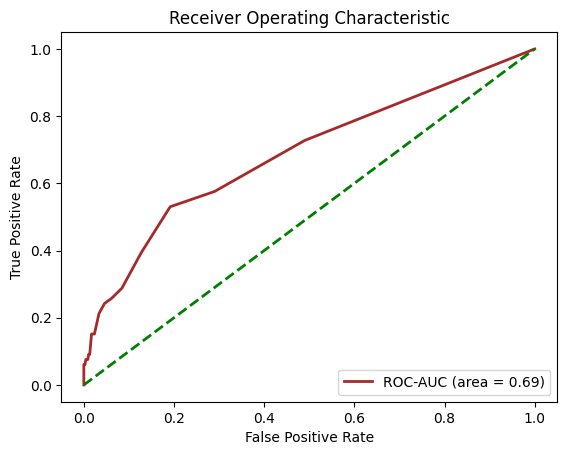

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

Y_pred = model.predict(X_val)
model = RandomForestClassifier(class_weight="balanced", random_state=42)
model.fit(X_train, Y_train)

try:
    Y_prob = model.predict_proba(X_val)[:, 1] # Получение вероятностей для класса 1
    
    # ВАЖНО: Проверка на корректный размер Y_prob и Y_val. Если Y_prob имеет неправильный размер, это может привести к ошибке
    if Y_prob.shape[0] != len(Y_val):
        raise ValueError("Несоответствие размеров Y_prob и Y_val.")

    fpr, tpr, thresholds = roc_curve(Y_val, Y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color="brown", lw=2, label=f"ROC-AUC (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="green", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic")
    plt.legend(loc='lower right')
    plt.show()

except ValueError as e:
    print(f"Ошибка при вычислении ROC-AUC: {e}")
except AttributeError as e:
    print(f"Ошибка доступа к атрибуту модели: {e}")
except Exception as e:
    print(f"Неожиданная ошибка: {e}")

